In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [79]:
df = pd.read_csv("sources/vehicles.csv", nrows=10000,index_col=0)
df.tail()

,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
id,,,,,,,,,,,,,,,,,,,,,
7316825923,https://phoenix.craigslist.org/evl/ctd/d/mesa-...,phoenix,https://phoenix.craigslist.org,15999,2015.0,gmc,acadia sle-1,good,6 cylinders,gas,...,full-size,SUV,red,https://images.craigslist.org/00Y0Y_iukNOte9S5...,2015 GMC Acadia SLE-1 Financing Available!!! 6...,NaN,az,33.415592,-111.657979,2021-05-04T10:48:28-0700
7316825904,https://phoenix.craigslist.org/evl/ctd/d/mesa-...,phoenix,https://phoenix.craigslist.org,6999,2012.0,ford,focus sel hatchback,good,4 cylinders,gas,...,mid-size,hatchback,silver,https://images.craigslist.org/00i0i_kWRkjnGmCZ...,2012 Ford Focus SEL Hatchback Loaded!!! 4 CYL ...,NaN,az,33.415592,-111.657937,2021-05-04T10:48:27-0700
7316825646,https://phoenix.craigslist.org/evl/ctd/d/mesa-...,phoenix,https://phoenix.craigslist.org,24999,2015.0,ram,1500 big horn,good,8 cylinders,gas,...,full-size,pickup,silver,https://images.craigslist.org/00l0l_9KhJhGzJE5...,2015 Ram 1500 Quad Cab Big Horn HEMI!!! 8 CYL ...,NaN,az,33.415592,-111.657915,2021-05-04T10:48:02-0700
7316825626,https://phoenix.craigslist.org/evl/ctd/d/mesa-...,phoenix,https://phoenix.craigslist.org,7999,2011.0,ford,fusion sel,good,4 cylinders,gas,...,full-size,sedan,grey,https://images.craigslist.org/00101_az5R00dbXW...,2011 Ford Fusion SEL Nicely Loaded!!! 4 CYL En...,NaN,az,33.415628,-111.657958,2021-05-04T10:48:00-0700
7316825372,https://phoenix.craigslist.org/evl/ctd/d/mesa-...,phoenix,https://phoenix.craigslist.org,10999,2012.0,chrysler,200 s convertible,like new,6 cylinders,gas,...,mid-size,convertible,white,https://images.craigslist.org/00Y0Y_dm8XwXGMb9...,2012 Chrysler 200 S Hard Top Convertible Nicel...,NaN,az,33.415628,-111.657894,2021-05-04T10:47:36-0700


In [80]:
df = df.dropna(subset=["model", "odometer", "year","price"]).copy()
df = df.drop(7315961634)
df= df[df['price'] > 100]

In [82]:
CAT_FEATURES = [ "manufacturer", "model",  "condition", "cylinders","fuel","title_status","transmission", "drive", "size", "type", "paint_color"]
NUM_FEATURES = ["odometer", "year"]

y = np.log1p(df["price"])                            

X = df[CAT_FEATURES + NUM_FEATURES]

for col in X[CAT_FEATURES].columns:
    print(f"{df[col].value_counts()}")

manufacturer
ford               1641
chevrolet          1436
toyota              707
jeep                489
nissan              437
honda               373
gmc                 368
ram                 354
dodge               348
kia                 274
bmw                 268
subaru              204
lexus               190
mercedes-benz       185
hyundai             184
acura               170
volkswagen          160
cadillac            157
chrysler            135
audi                134
buick               120
infiniti            119
lincoln             103
mazda                95
volvo                72
mitsubishi           55
jaguar               54
mini                 51
rover                39
pontiac              38
alfa-romeo           34
porsche              22
tesla                20
fiat                 18
mercury              18
saturn               14
harley-davidson       5
ferrari               2
Name: count, dtype: int64
model
f-150                           231
silvera

In [83]:
X.tail()

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,odometer,year
id,,,,,,,,,,,,,
7316825923,gmc,acadia sle-1,good,6 cylinders,gas,clean,automatic,fwd,full-size,SUV,red,135000.0,2015.0
7316825904,ford,focus sel hatchback,good,4 cylinders,gas,clean,automatic,fwd,mid-size,hatchback,silver,153000.0,2012.0
7316825646,ram,1500 big horn,good,8 cylinders,gas,clean,automatic,rwd,full-size,pickup,silver,107000.0,2015.0
7316825626,ford,fusion sel,good,4 cylinders,gas,clean,automatic,fwd,full-size,sedan,grey,121000.0,2011.0
7316825372,chrysler,200 s convertible,like new,6 cylinders,gas,clean,automatic,fwd,mid-size,convertible,white,94000.0,2012.0


In [84]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9432 entries, 7316814884 to 7316825372
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  9093 non-null   object 
 1   model         9432 non-null   object 
 2   condition     5138 non-null   object 
 3   cylinders     6366 non-null   object 
 4   fuel          9346 non-null   object 
 5   title_status  9259 non-null   object 
 6   transmission  9380 non-null   object 
 7   drive         6776 non-null   object 
 8   size          2457 non-null   object 
 9   type          7783 non-null   object 
 10  paint_color   7621 non-null   object 
 11  odometer      9432 non-null   float64
 12  year          9432 non-null   float64
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


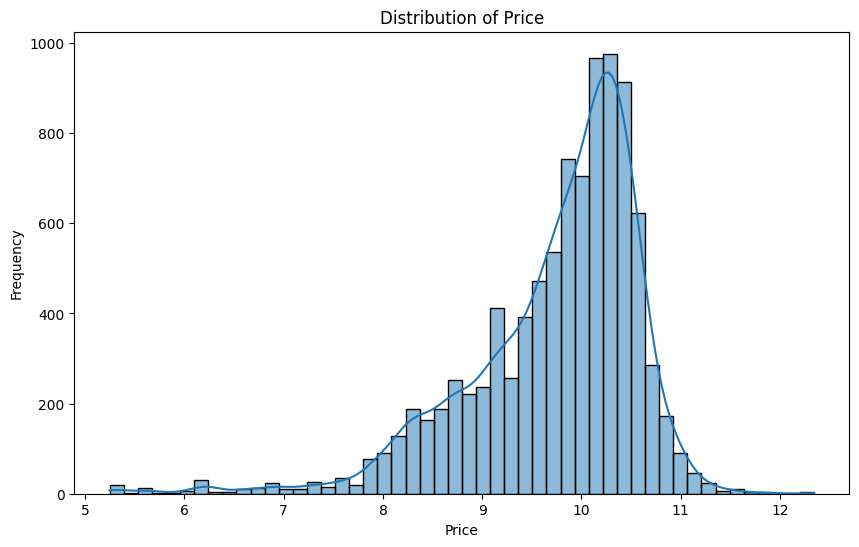

In [85]:
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=50)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

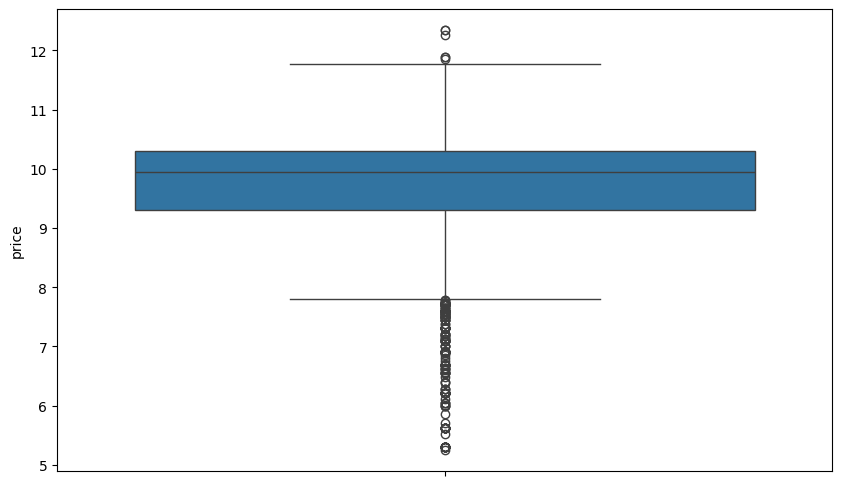

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(y)
plt.show()